(app:ch14:hypotest_intro)=
## Hypothesis Testing with coin flips

To describe how hypothesis testing works from an implementation perspective, we'll naturally return to coin flips. A gambler has a coin, and asks us to gamble one dollar. If the coin lands on heads, we obtain our dollar back, and an additional dollar. If the coin lands on tails, we lose our dollar. We get to observe $10$ random coin flips, and determine whether we want to play the game. 

As it turns out, if this coin has a probability of landing on heads greater than $0.5$, we will, over time, *make* money if we continue to play the game. If the coin has a probablity of landing on heads less than $0.5$, we will, over time, *lose* money if we continue to play the game. So, if we are going to play the game in a principled way, we want to be really sure that we are going to gain money by playing. How can we use hypothesis testing to use a little bit of math to determine whether we should play or not?

To begin, we need to delineate our hypotheses. Here, our question of interest is, should we play the game? Therefore, the alternative hypothesis is the one where we *should* play the game, or the coin has a probability greater than $0.5$. The null hypothesis is that we should *not* play the game, or the coin has a probability that is not greaterr than $0.5$. If we use $p$ to denote the probability that the gambler's coin lands on heads, we write this as $H_A: p > 0.5$, against the null hypothesis that $H_0: p \leq 0.5$.

Let's say that we observe $10$ coin flips, and we see that the coin lands on heads $6$ times. If we were to estimate the coin's probability of landing on heads, like we did in {numref}`app:ch13:mle`, we would get that $\hat p = \frac{6}{10}$, or that our estimate $\hat p = 0.6$. It's pretty obvious that $\hat p$ is greater than $0.5$, so we should play the game, right?

The answer is a little more complicated than that. If you take a fair coin (one that is roughly equally likely to land on heads and tails) and flip it enough times, you will probably find a sequence of ten flips with six heads. We are scientists, after all, so we want to be *really* sure that if we play we are going to make money. In statistical speak, we want to be sure that if we play the game, there is a low chance that we are actually wrong. We want to know exactly what the chances are that, if we were *wrong*, we could still have seen the estimate $\hat p$ that we calculated. This is where a concept called a *p-value* comes into play. 

#### $p$-values tell us the chances of observing an outcome if the null hypothesis is true

To understand the $p$-value, we must first introduce a concept called a *test statistic*. A **test-statistic** is a fancy word for a data-derived quantity that summarizes our data (which is the definition of a *statistic*) with a single number which will be used for hypothesis testing (and hence, it is a *test statistic*). The test statistic should capture a property of the data that is relevant to our question of interest (here, the probability that the coin lands on heads), so it makes sense in our example to just use the estimate of the probability that the coin lands on heads as our test statistic. In general, the **$p$-value** is the probability that we would incorrectly reject the null hypothesis (that is, that the coin is fair) in favor of the alternative hypothesis (that is, that the coin is not fair) if the null hypothesis were really true. 

Next, we need to think about what types of values we would see from the test statistic if the null hypothesis were true. If the coin really had a probability of $0.5$ of landing on heads and we flipped it $10$ times, there is a non-zero probabaility that we would see all heads and our estimate would have been $1.0$, that we would see $9$ heads and $1$ tails and our estimate would have been $0.9$, so on and so-forth all the way to the outcome where we see only tails and our estimate would have been $0.0$. Which one we observed when watching the gambler flip the coin would come down to *random chance*, so we will use the random variable $\mathbf{\hat p}_0$ to describe this quantity. Specifically, $\mathbf{\hat p}_0$ is a random variable which takes values between $0$ and $1$ in $0.1$ probability increments. $\mathbf{\hat p}_0$'s probability of taking a given increment $k$ is equal to the probability that we would have estimated the probability to be $k$ if the null hypothesis (the coin is fair and lands on heads with probability $0.5$) were true. $\mathbf{\hat p}_0$ takes each increment with the following probabilities:

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import pandas as pd
from scipy.stats import binom

incr = [i/10 for i in range(0, 11)]
probs = [binom.pmf(k=i*10, n=10, p=0.5) for i in incr]

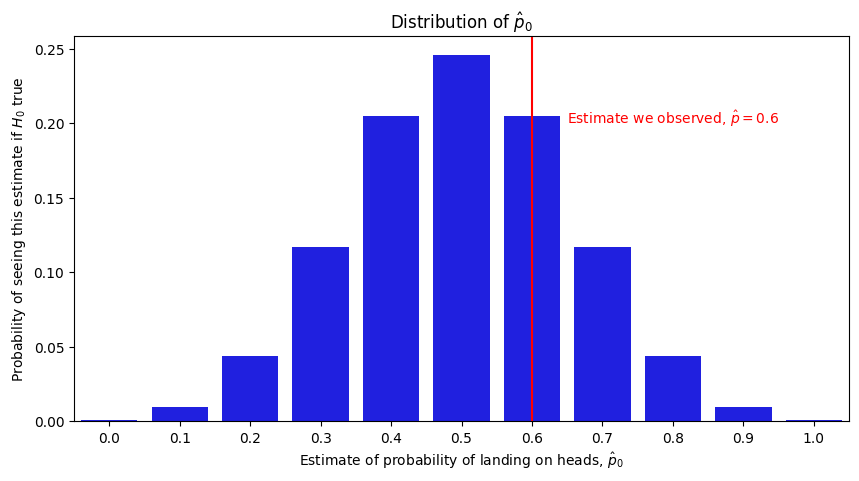

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(incr, probs, color="blue", ax=ax);
ax.set_xlabel("Estimate of probability of landing on heads, $\hat p_0$")
ax.set_ylabel("Probability of seeing this estimate if $H_0$ true")
ax.set_title("Distribution of $\hat p_0$");
ax.axvline(6, color="red")
ax.text(6.5, .2, "Estimate we observed, $\hat p = 0.6$", color="red");

So, this is a little surprising! Even if the null hypothesis were true and the coin really landed on heads with a probability of $0.5$, there is still a pretty good chance we would observe a probability of at least $0.6$ if we were to flip a fair coin $10$ times. We describe this quantity using a $p$-value, which is the probability of seeing a test statistic at least as extreme as the one we calculated from our data if the null hypothesis were true. Here, the $p$-value is the probability that, if the coin were fair, we would produce an estimate of $0.6$, $0.7$, $0.8$, $0.9$, or $1.0$. This is the sum of all of the heights of the corresponding bars in the above plot, which turns out to be $0.377$. This approach is called the *binomial test*, which we can implement in python as follows:

In [4]:
from scipy.stats import binom_test

nheads = 6  # the number of heads in the experiment
nflips = 10  # the total number of coin flips in the experiment
p0 = 0.5  # the probability of the coin under the null hypothesis

print("p-value: {:.3f}".format(binom_test(nheads, nflips, p=p0, alternative="greater")))

p-value: 0.377


This might be enough for you to play the game, but as scientists we usually like to be a little more confident than this when we report something. We use the term the "$\alpha$ of the test" to describe what an acceptable chance of being incorrect is for us. We can pick $\alpha$ to be anything we want really so long as decide this threshold before calculating the $p$-value. When the $p$-value is less than $\alpha$, we report that we have evidence in support of rejecting the null hypothesis in favor of the alternative hypothesis. When the $p$-value is greater than $\alpha$, we report that we have insufficient evidence to rejectthe null hypothesis in favor of the alternative hypothesis.

Usually, scientists choose $\alpha$ to be $0.05$. Intuitively, this corresponds to us stating that, after all of the assumptions that we made throughout the scientific process (things that went into the statistical modelling), we consider an acceptable fraction of outcomes where we incorrectly reject the null hypothesis in favor of the alternative hypothesis to be about $5\%$ of the tim. In other words, we look for a $p$-value that is less than $0.05$. 

It is worth noting that there are multiple types of statistical tests. In this example, we saw an instance of something called a *one-sample test*. A **one-sample test** is a statistical test in which we derive conclusions using a single sample of data (hence the term, one-sample). In this case, we only have a single sample, which are the outcomes from each of the coin flips. This is only called a one-sample test, and not a (however many times we flip the coin) sample test because we expect that all of the coin flips are the outcome of identical coins (the same coin is used for each flip). 

(app:ch14:hypotest_intro:weighted)=
### Two-sample tests with weighted networks

When the networks were unweighted, everything made complete sense in the context of our coin flip regime. For weighted networks, on the other hand, things can go a *little* bit differently. To understand this question in the context of weighted networks, we'll return to our discussion on the SIEM, and reformulate it a little bit for the case where the adjacency matrix's entries take non-binary values (they aren't just zeros and ones).

##### The weighted SIEM has a vector of distribution functions

For the weighted SIEM, the first parameter is identical to that of the unweighted SIEM: the edge cluster matrix, $Z$, which is an $n \times n$ matrix whose entries $z_{ij}$ indicate which of the $K$ clusters the $(i, j)$ edge is in.

The second parameter is a little different. Remember for the unweighted case, we had a probability vector, $\vec p$, whose entries $p_k$ indicated the probability of an edge in the $k^{th}$ edge cluster. How do we extend this concept to edges which are not binary valued? To accomplish this, we introduce disribution functions.

Remember we said that, for a particular edge $\mathbf a_{ij}$ where the edge cluster for the $(i,j)$ edge was $z_{ij}$, that $\mathbf a_{ij}$ took a value of one with probability $p_{z_{ij}}$, and zero with probability $1 - p_{z_{ij}}$. As it turns out, what this says at a deeper level is that $\mathbf a_{ij}$ has a *distribution* whose parameter is just a probability $p_{z_{ij}}$. The distribution, in this case, is the *Bernoulli* distribution with probabilty $p_{z_{ij}}$. However, there are other distributions we could use as well for $\mathbf a_{ij}$. 

You are probably already familiar with the Normal distribution, which has a mean $\mu$ and a standard deviation $\sigma$. What you need to know about the Normal distribution is that, if you were to sample a large number of points and then plotted their values on a histogram, you would see "roughly" a Bell-curve type of shape to the tops of the histogram bars. These bars would be centered roughly around the mean value $\mu$, the bars would be roughly symmetric (the heights on either side of the mean would be about equal), and that about $68\%$ of the data would be between $\mu - \sigma$ and $\mu + \sigma$ (within one standard deviation). In the below plot, we will simulate $10,000$ samples $x_i$ of random variables $\mathbf x_i$, which are Normally distributed with a mean of $0$ and a standard deviation of $5$, $10,000$ samples $y_i$ of random variables $\mathbf y_i$ with are Normally disributed with a mean of $5$ and a standard deviation of $5$, and $10,000$ samples $z_i$ of random variables $\mathbf z_i$ which are Normally distributed with a mean of $0$ and a standard deviation of $15$. We will then compute histograms so we can get a sense of how the Normal distribution behaves:

In [7]:
import numpy as np

params = {"xi": {"loc":0, "scale": 5}, "yi": {"loc":10, "scale": 5}, "zi": {"loc":0, "scale": 15}}
nsim = 50000

samples = []
for idx, param in params.items():
    samples.extend([{"Sample": idx, "Value": x} for x in np.random.normal(size=nsim, **param)])

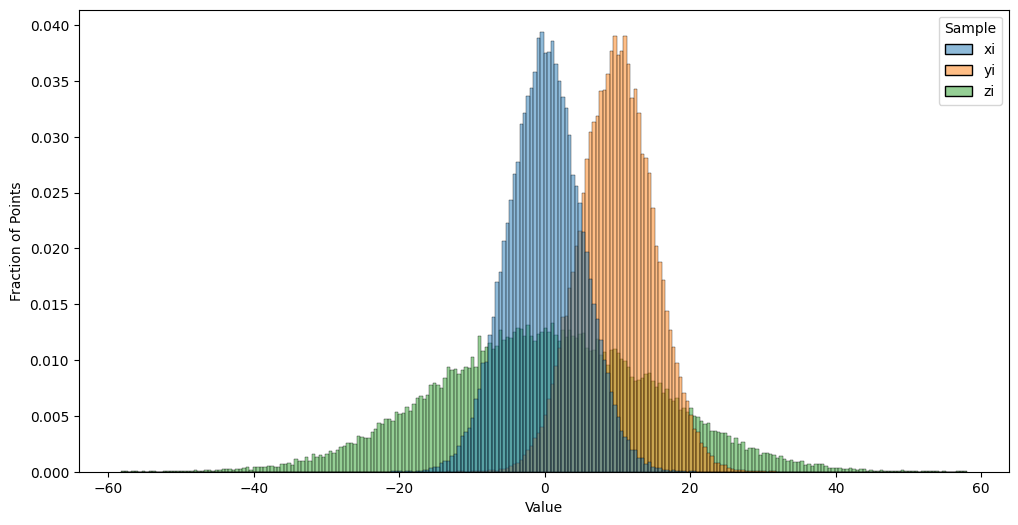

In [8]:
import pandas as pd
real_df = pd.DataFrame(samples)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.histplot(real_df, x="Value", hue="Sample", stat="probability",
            ax=ax, common_norm=False)
ax.set_ylabel("Fraction of Points");

Notice that samples of $\mathbf x_i$ and $\mathbf y_i$ differ in the approximate centers of the histograms. This reflects that the mean of the random variables $\mathbf x_i$ are $10$ units less than the means of $\mathbf y_i$. Further, samples of $\mathbf z_i$ appear to take a "wider" range of values than samples of $\mathbf x_i$, despite the centers looking to be in approximately the same spot (right around zero). This reflect that the standard deviation of the random variables $\mathbf z_i$ exceed that of the $\mathbf x_i$ by $10$ units. We could, in a generic sense, say that the points $\mathbf x_i$ have distribution $F_x$, the points $\mathbf y_i$ have the distribution $F_y$, and the points $\mathbf z_i$ have the distribution $F_z$. Here, $F_x$ just so happens to be the Normal distribution with mean $0$ and standard deviation $5$, but we don't need to be that specific when defining the weighted SIEM.

For the weighted SIEM, we will have a length-$K$ vector $\vec F$ of distribution functions, where $F_k$ defines the distribution for the $k^{th}$ cluster. In this sense, $F_k$ could be any distribution really; it could be the normal distribution with mean $\mu_k$ and standard deviation $\sigma_k$, it could be the Bernoulli distribution with probability $p_k$, or it could be something more complicated. There are any number of possibilities for what the edge-weight distribution could be. 

Unfortunately, we can't quite use our coin flip example since the weighted SIEM does not necessarily have binary-valued adjacencies. For each entry $\mathbf a_{ij}$, we identify the corresponding cluster $z_{ij}$ that this edge is in. Remember that $z_{ij}$ takes one of $K$ possible values. We say that $\mathbf a_{ij}$ has the distribution indicated by the distribution function $F_{z_{ij}}$.

If $\mathbf A$ is an SIEM random network with $n$ nodes, the cluster assignment matrix $Z$, and the distribution vector $\vec F$, we say that $\mathbf A$ is an $wSIEM_n(Z, \vec F)$ random network.

Next, let's look at how one would sample from a weighted SIEM. The procedure below will simulate a sample $A$ of the random network $\mathbf A$ which is $wSIEM_n(Z, \vec F)$. 

```{admonition} Simulating a sample from an $wSIEM_n(Z, \vec F)$ random network
1. Determine a cluster assignment matrix $Z$ for each edge of the network. Each edge entry $z_{ij}$ can take one of $K$ possible values.
2. Determine a length-$K$ distribution vector for each of the $K$ clusters.
4. For each edge $(i, j)$:
    * Denote $z_{ij}$ to be the cluster assignment of the potential edge between node $i$ and node $j$.
    * Sample a single sample from the distribution function $F_{z_{ij}}$, and record the result as $\mathbf a_{ij}$. 
5. The adjacency matrix we produce, $A$, is a sample of an $SIEM_n(Z, \vec p)$ random network.
```

Next, let's come up with a working example for the weighted SIEM network. Let's imagine that we have the brain of an individual. The $n=100$ nodes are areas of the brain. For instance, there is a node of the brain responsible for movement, an area of the brain which is responsible for sight, so on and so forth. As you may be aware, the brain is split into two hemispheres, the left and right hemispheres. In many cases, these areas of the brain have a *bilateral analogue*, which means that the same area of the brain appears in the left and right hemispheres. While the region of the brain may have a slightly different function in each of the two hemispheres, they tend to work together to perform functions for the individual. For instance, if the left motor area is active when someone is walking, the right motor area will tend to be active too. In this case, our edge weights are how strongly two regions of the brain tend to *correlate* with one another over the course of the day. 

As we learned in the section on the rho-correlated SBM in {numref}`ch5:multi`, correlation is a value between $-1$ (the two areas are *never* active together) and $1$ (the two areas *always* are active together). If we organize the nodes first by hemisphere (left, then right) and second by the region of the brain, what we would anticipate is that the bilateral areas would tend to be higher correlated than non-bilateral areas. This would be reflected as an "off-diagonal" band (the *bilateral band*, cluster 2) that tends to have higher values than the other entries of the adjacency matrix (*non-bilateral edges*, cluster 1). The way we will simulate this is as follows. The non-bilateral edges will have a distribution that is between $-0.5$ and $0.5$, with no particular values being more or less likely. On the other hand, the bilateral band will tend to have higher values:

In [14]:
from graphbook_code import siem

n = int(100)
p = [1, 1]  # edges are always present
Z = np.ones((n, n), dtype=int)  # initialize edge clusters Z
band_idx = np.where((np.eye(n, k=int(n/2)) == 1) | (np.eye(n, k=int(-n/2)) == 1))

Z[band_idx] = 2  # set the bilateral edges to cluster 2
Z[np.diag_indices(n)] = 0  # remove the diagonals from edge clusters, since the network is loopless

A = siem(n, p=p, edge_comm=Z, wt=[np.random.uniform, np.random.beta], 
         wtargs=[{"low": -.5, "high": .5}, {"a": 8, "b": 2}])

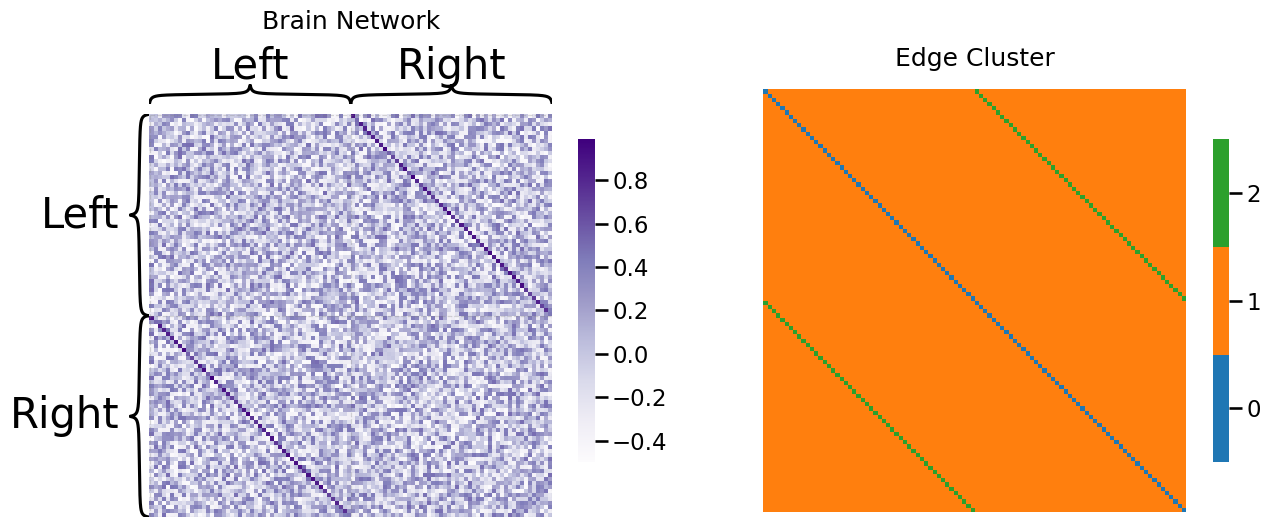

In [15]:
from graphbook_code import heatmap

fig, ax = plt.subplots(1,2,figsize=(15, 6))
zs = ["Left" for i in range(0, int(n/2))] + ["Right" for i in range(0, int(n/2))]
heatmap(A, ax=ax[0], inner_hier_labels=zs, title='Brain Network')
heatmap(Z.astype(int), ax=ax[1], color="qualitative", title="Edge Cluster");

Notice that the edges in edge-cluster two (the bilateral bands) tend to have higher correlations than the edges in edge-cluster one (the non-bilateral bands). We can visualize this property by looking at a histogram of the two edge clusters:

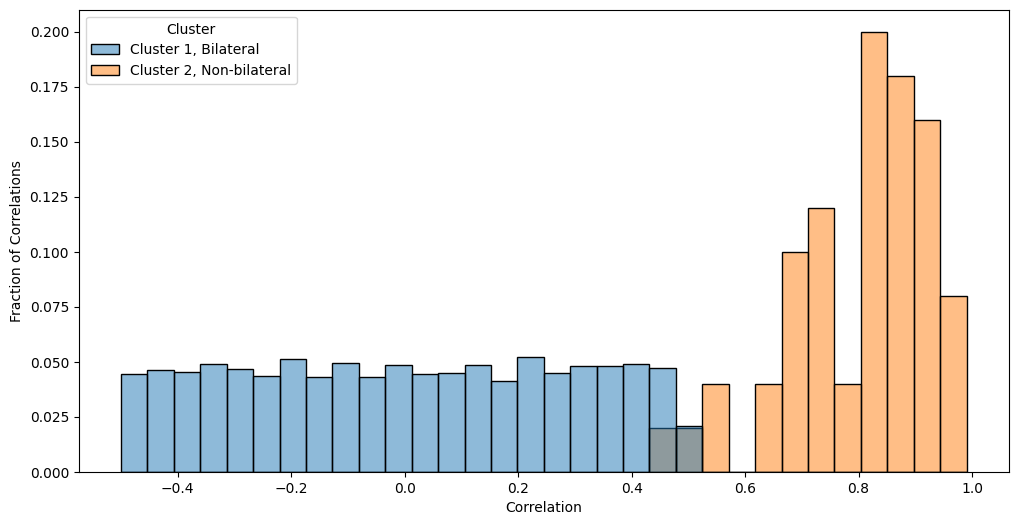

In [16]:
samples = []
edge_comm_name = {1: "Bilateral", 2: "Non-bilateral"}
for clust in [1, 2]:
    idx_clust = np.where(Z == clust)
    samples.extend([{"Cluster": "Cluster {}, {}".format(clust, edge_comm_name[clust]), "Correlation": A[x]} for x in zip(*idx_clust)])

real_df = pd.DataFrame(samples)

fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns.histplot(real_df, x="Correlation", hue="Cluster", stat="probability",
            ax=ax, common_norm=False)
ax.set_ylabel("Fraction of Correlations");

Now that we are in a statistical testing mindset, a question you might have is that the correlations for cluster two tend to look much larger than the correlations for cluster one. How do we formalize this relationship? We can't use the fisher's exact test, since the fisher's exact test only worked for the case where our network was unweighted and the adjacency matrix took only binary values ($0$ or $1$). What can we do for a weighted network, when the adjacency matrix is not resticted to binary values? To formalize our situation a bit more, let's return to making some hypotheses about the data. We want to test whether the correlations in the second cluster exceed the correlations in the first cluster. This means that we have an alternative hypothesis $H_A:$ correrlations in cluster two $>$ correlations in cluster one. Remember that for two sample testing, the null hypothesis is going to be the opposite, so $H_0:$ correlations in cluster two $\leq $ correlations in cluster one. This is the weighted two-sample hypothesis testing problem.

##### The Mann-Whitney Wilcoxon $U$ Test

There are a variety of approaches to overcoming the weighted two-sample hypothesis testing problem. A popular approach is known as the two-sample $t$-test, which basically means that we assume that the samples are really just normally distributed, with some mean and variance, and then we forget about the actual data after we estimate these means and variances. In so doing, we construct a test statistic by using properties about the normal distribution (e.g., that the mean and the variance are the *only* useful pieces of information in the data), not the actual data itself. To read more about the two-sample $t$-test, we would recommend you check out {cite:p}`ttest`. Unfortunately, if the data is not well-summarized by a normal distribution, the $t$-test tends to be a fairly poor choice for hypothesis testing. Instead, what we tend to use for the weighted two-sample hypothesis testing problem is we turn to what is known as the $U$-test. Instead of relying on assumptions that the data is normally distributed, the $U$-test does not assume anything about the nature of the distribution itself. The only assumptions that it makes are that the data (in this case, the edges for each cluster) is independent, which falls right in line with the generative description we gave for the SIEM. 

You can think of this, intuitively, as the $t$-test assuming the data distribution following the "bell shape" of the normal distribution (and therefore, tries to compare two "bell shaped" curves), whereas the $U$-test does not make this assumption and instead only uses the data itself. Even when the data is normally distributed, the $U$-test still tends to perform almost as well as the $t$-test. For this reason, we find the $U$-test to be a better procedure than other forms of testing that make heavy assumptions about the distributions of edge weights.

The $U$-test is very easy to implement in `graspologic`. We simply fit an SIEM to the data using the `SIEMEstimator` class:

In [17]:
from graphbook_code import SIEMEstimator

model = SIEMEstimator()
model.fit(A, Z)

aand then we use the `compare` function to test whether cluster `2` is greater than cluster `1` by specifying `alternative="greater"` as a `methodarg`:

In [18]:
from scipy.stats import mannwhitneyu

# perform mann-whitney u-test with alternative hypothesis that 
# correlations of cluster 2 > correlations of cluster 1
tstat, pval = model.compare(2, 1, method=mannwhitneyu, methodargs={"alternative": "greater"})
print("p-value: {:.3f}".format(pval))

p-value: 0.000


Since the $p$-value is much less than $0.05$ (the print statement cut off at 3 decimal places, but in reality, it is about $10^{-64}$, which is *really* tiny!), with our decision threshold $\alpha = 0.05$, we reject the null in favor of the alternative hypothesis that the correlations in cluster two (the bilateral edges) really are bigger than the correlations in cluster one (the non-bilateral edges).

We could also use a similar, but slightly reworded, hypothesis and get the same answer. Note that saying that the correlations in cluster two are bigger than the correlations in cluster one would be the same as saying that the correlations in cluster one are smaller than the correlations in cluster two. We can reorder the clusters we are testing, and instead specify the alternative hypothesis as `"less"`:

In [19]:
tstat, pval = model.compare(1, 2, method=mannwhitneyu, methodargs={"alternative": "less"})
print("p-value: {:.3f}".format(pval))

p-value: 0.000


Which would obviously give us the same answer.

If you instead wanted to use a $t$-test or a different testing approach, you can do that very easily with graspologic, too. Just pass your testing strategy using the `method` argument, and pass additional arguments for the testing strategy to the `methodargs` dictionary. The only requirement is that the testing strategy takes two unnamed arguments, where the first argument is the first cluster of data, and the second argument is the second cluster of data. Here, we will be using `ttest_ind` [from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html). We want to assume as little as possible about the data, so we will specify that the variances might not necessarily be equal as well:

In [20]:
from scipy.stats import ttest_ind

# perform mann-whitney u-test with alternative hypothesis that 
# correlations of cluster 2 > correlations of cluster 1
tstat, pval = model.compare(2, 1, method=ttest_ind, methodargs={"alternative": "greater", "equal_var": False})
print("t statistic: {:.2f}, p-value: {:.3f}".format(tstat, pval))

t statistic: 64.60, p-value: 0.000


And again we get a $p$-value that is much less than our decision threshold, so again we reject the null in favor of the alternative hypothesis that the correlations in cluster two exceed the correlations in cluster one.